In [2]:
print("hello world")

hello world


I'm trying to recreate some of their figures

In [6]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 22})

import math
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from IPython.display import clear_output, display

%matplotlib inline



import numpy as np

Load dataframe 

In [3]:
df = pd.read_csv('CdSe_synthesis.csv')
df.head()

,Temperature,Growth,Metal_source,Metal_amount,Metal_mmol,Metal_concentration,Chalcogen_source,Chalcogen_amount,Chalcogen_mmol,Chalcogen_concentration,...,Chalcogen/Ph_ratio,Solvent I,S_I_amount,Solvent II,S_II_amount,Total_amount,Time_min,Diameter_nm,Diameter from,Citation
0,300.0,300.0,cadmium stearate,0.1300,0.2,0.020000,Se powder,0.06000,0.80,0.070000,...,0.240000,octadecene,10.0000,None,0.0,11.65000,5.0,3.41,TEM,J. Phys. Chem. C 2012 116 47 25065 - 25073
1,225.0,225.0,cadmium oxide,0.0100,0.1,0.010000,Se powder,0.03000,0.38,0.040000,...,0.420000,octadecene,7.8900,None,0.0,8.80000,0.5,2.50,TEM,Colloids and Surfaces A: Physicochemical and E...
2,250.0,250.0,cadmium stearate,0.0678,0.1,0.035258,Se powder,0.00395,0.05,0.017629,...,0.000000,octadecene,2.7645,None,0.0,2.83625,0.5,1.99,TEM,J. Phys. Chem. Lett. 2017 8 15 3576-3580
3,250.0,250.0,cadmium stearate,0.0678,0.1,0.034916,Se powder,0.00395,0.05,0.017458,...,0.666667,octadecene,2.7645,None,0.0,2.86405,0.5,2.13,TEM,J. Phys. Chem. Lett. 2017 8 15 3576-3580
4,250.0,250.0,cadmium stearate,0.0678,0.1,0.034916,Se powder,0.00395,0.05,0.017458,...,0.666667,octadecene,2.7645,None,0.0,2.86405,1.0,2.27,TEM,J. Phys. Chem. Lett. 2017 8 15 3576-3580


In [4]:
df.describe()

,Temperature,Growth,Metal_amount,Metal_mmol,Metal_concentration,Chalcogen_amount,Chalcogen_mmol,Chalcogen_concentration,Metal/Se_ratio,CA_amount,...,Cd/CA_ratio,Amines_amount,Phosphines_amount,Phosphines_mmol,Chalcogen/Ph_ratio,S_I_amount,S_II_amount,Total_amount,Time_min,Diameter_nm
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,...,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,238.800000,238.771429,0.216379,1.515937,0.129185,0.174202,2.245394,0.253889,1.120082,1.234086,...,0.304467,1.744098,1.903089,4.980394,0.473093,13.193538,4.136640,22.613151,85.829147,3.066551
std,87.492873,58.901640,0.353460,2.559208,0.315351,0.258511,3.258675,1.319711,0.960095,2.303871,...,0.630149,3.126492,3.612092,9.778334,0.492988,21.944517,6.622677,24.520360,397.077925,1.650595
min,20.000000,45.000000,0.010000,0.086000,0.006600,0.003950,0.050000,0.004424,0.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.480000,0.003300,0.850000
25%,230.000000,230.000000,0.026000,0.200000,0.022600,0.019000,0.240000,0.020000,0.400000,0.148000,...,0.090000,0.000000,0.300000,0.810000,0.083333,0.000000,0.000000,6.449600,0.500000,1.970000
50%,275.000000,260.000000,0.067800,0.470000,0.030450,0.049000,0.620000,0.048050,1.000000,0.400000,...,0.185700,0.000000,0.850000,2.300000,0.308600,4.343000,0.014250,14.691000,4.775000,2.665000
75%,300.000000,280.000000,0.260000,1.900000,0.050000,0.160000,2.500000,0.130000,1.370000,1.490000,...,0.285700,2.000000,2.406000,5.610000,0.666667,14.980000,8.700000,20.925100,16.000000,3.700000
max,330.000000,330.000000,1.900000,13.350000,1.900000,0.790000,9.990000,12.400000,6.000000,16.110000,...,3.330000,10.000000,20.780000,56.100000,4.264000,101.400000,28.310000,108.050000,4180.000000,11.500000


## Recreate Figure 1

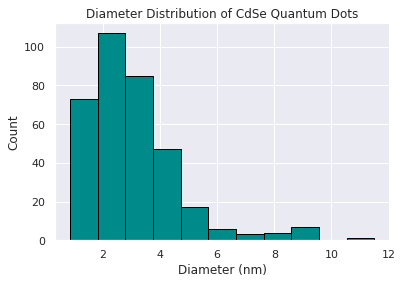

In [16]:
sns.set_theme()
plt.hist(df['Diameter_nm'],bins=11, color='darkcyan', edgecolor='black')
plt.xlabel('Diameter (nm)')
plt.ylabel('Count')
plt.title('Diameter Distribution of CdSe Quantum Dots')
plt.show()

## Recreate Figure 2 for CdSe

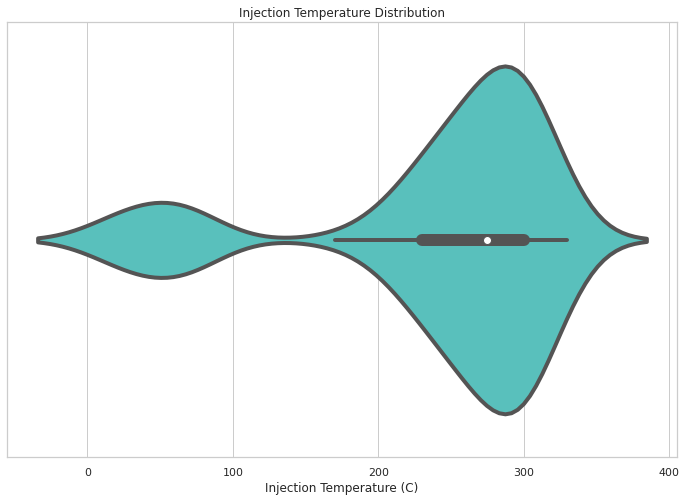

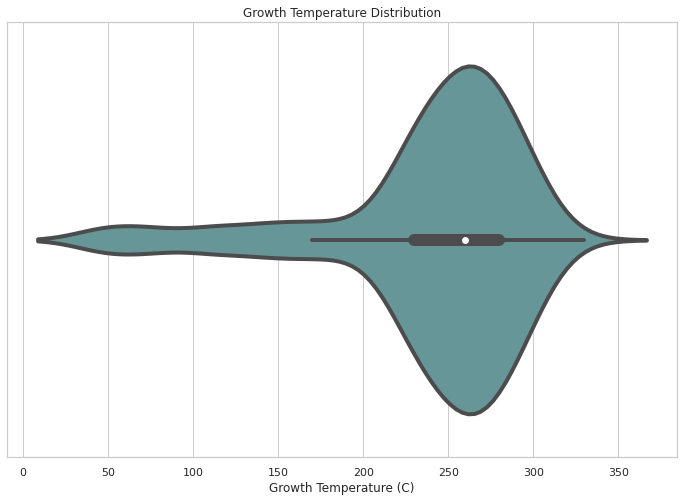

In [54]:
fig, axes = plt.subplots(figsize=(12,8))
ax = sns.violinplot(x=df["Temperature"], linewidth = 4, color='mediumturquoise')
ax.set(xlabel='Injection Temperature (C)', title='Injection Temperature Distribution')

fig, axes = plt.subplots(figsize=(12,8))
ax = sns.violinplot(x=df["Growth"], linewidth = 4, color='cadetblue')
ax.set(xlabel='Growth Temperature (C)', title='Growth Temperature Distribution')


plt.show()